In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from chainconsumer import ChainConsumer
from sbi_lens.config import config_lsst_y_10

In [3]:
# plot params

plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["lines.linewidth"] = 1
plt.rcParams['lines.markersize'] = 3
color = [
   '#f8c471',
    '#d68910',
    '#cd6155',
    '#edbb99',
    '#5d6d7e',
    '#73c6b6',
    '#a3b899'
]

In [19]:
table = pd.read_table("../results/store_experiments_sbi.csv", sep=',')

c2st_info = table.loc[(
    (table['sbi_method'] == 'snle') & (table['nb_round'] == 5.0) & (table['c2st'] < 0.61)
)]

In [20]:
c2st_info

,experiment_id,sbi_method,nb_round,nb_simulations,c2st
100,exp_snle_5_1000_4,snle,5.0,1000,0.60715
102,exp_snle_5_1000_3,snle,5.0,1000,0.60315
108,exp_snle_5_1500_4,snle,5.0,1500,0.59445
109,exp_snle_5_1500_5,snle,5.0,1500,0.59450
111,exp_snle_5_1500_1,snle,5.0,1500,0.58990
112,exp_snle_5_1500_3,snle,5.0,1500,0.59700
114,exp_snle_5_1500_2,snle,5.0,1500,0.59845
116,exp_snle_5_2000_5,snle,5.0,2000,0.58815
117,exp_snle_5_2000_4,snle,5.0,2000,0.59080
122,exp_snle_5_2000_2,snle,5.0,2000,0.57825


In [23]:
exp_id = 'exp_snle_5_1000_4'
posterior = np.load('../results/experiments_sbi/{}/posteriors_sample.npy'.format(exp_id))

In [24]:
truth = config_lsst_y_10.truth
params_name = config_lsst_y_10.params_name_latex
path_to_access_sbi_lens = '/gpfswork/rech/eqw/ufa23yn'

sample_ff = np.load(
    f"{path_to_access_sbi_lens}/sbi_lens/sbi_lens/data/posterior_full_field__256N_10ms_27gpa_0.26se.npy"
)

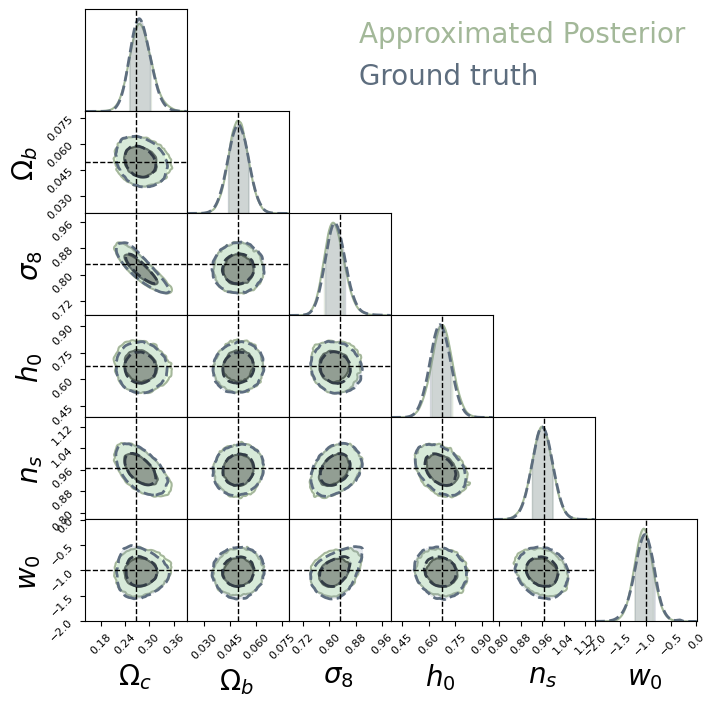

In [25]:
c = ChainConsumer()

c.add_chain(
        posterior,
        parameters=params_name,
        name='Approximated Posterior',
        linewidth=1.5,
        color = color[6],
        shade_alpha = 0.7
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Ground truth',
        linewidth=2,
        color =  color[4], #"#111111",
        shade_alpha = 0.2,
        linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.8,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_cvg_c2st.pdf')

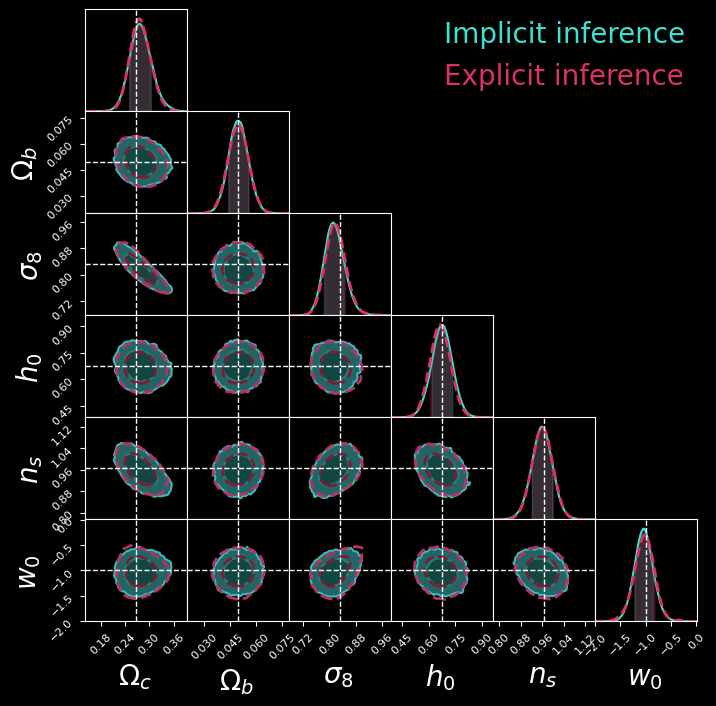

In [26]:
plt.style.use("dark_background")

c = ChainConsumer()

c.add_chain(
        posterior,
        parameters=params_name,
        name='Implicit inference',
        linewidth=1.5,
        color = "#40E0D0",
        shade_alpha = 0.4
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit inference',
        linewidth=2,
        color =  "#DE3163",
        shade_alpha = 0.,
        linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
c.configure_truth(color='w', ls="--", linewidth=1.)

fig = c.plotter.plot(
    figsize=0.8,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_cvg_c2st.png', transparent=True)